## API de Datos de Clima y su Relevancia

En el desarrollo de este proyecto basado en el dataset Bike Sharing Demand, he optado por integrar datos climáticos obtenidos a través de una API pública, como **Open-Meteo**, para complementar la información histórica sobre el alquiler de bicicletas. Esta decisión responde a la necesidad de enriquecer nuestro análisis exploratorio y predictivo con variables externas que tienen un impacto directo y significativo en el comportamiento de los usuarios de un sistema de bicicletas compartidas. El clima, como factor ambiental clave, no solo influye en la decisión de las personas de utilizar bicicletas, sino que también ofrece oportunidades estratégicas para generar insights accionables que pueden optimizar operaciones, mejorar la experiencia del cliente y aumentar la rentabilidad del negocio.

#### ¿Por qué una API de datos de clima?
La incorporación de datos climáticos a través de una API permite acceder a información actualizada y pronosticada (e.g., temperatura máxima y mínima, precipitación, códigos de condiciones climáticas) que no está disponible en el dataset original, el cual solo incluye registros históricos de 2011-2012 con variables como `temp`, `weather`, y `windspeed`. Al usar una API como Open-Meteo, obtenemos pronósticos para los próximos días (e.g., 7 días) en tiempo real, lo que permite:
1. **Extender el análisis al futuro**: Mientras que el dataset histórico es estático, los datos de la API nos dan una visión prospectiva, esencial para simulaciones y predicciones.
2. **Flexibilidad geográfica y temporal**: La API nos permite ajustar los datos al contexto de Washington D.C. (donde se recolectó el dataset), asegurando coherencia con las condiciones locales.

#### Relevancia para Insights de Negocio
La integración de datos climáticos tiene un valor estratégico inmenso para generar insights que impacten directamente en la gestión y el crecimiento del sistema de bicicletas compartidas. A continuación, se destacan las razones clave y ejemplos de cómo esta información puede traducirse en decisiones de negocio:

1. **Predicción de la Demanda y Optimización de Recursos**  
   Las condiciones climáticas son un determinante fundamental del uso de bicicletas. Por ejemplo, el análisis histórico muestra que la demanda (`count`) cae significativamente con clima severo (`weather=4`, tormentas) o temperaturas extremas. Al combinar estos patrones con pronósticos climáticos, podemos:
   - **Insight**: Predecir una caída del 50% en la demanda el próximo martes si se espera lluvia fuerte (e.g., 5 mm de precipitación).
   - **Acción de Negocio**: Reducir la redistribución de bicicletas a estaciones expuestas y priorizar mantenimiento en ese día, ahorrando costos operativos.

2. **Segmentación de Usuarios y Estrategias de Marketing**  
   Los datos climáticos, junto con variables como `casual` y `registered`, permiten identificar cómo diferentes tipos de usuarios reaccionan al clima. Por ejemplo, usuarios casuales podrían evitar días ventosos, mientras que los registrados (más habituales) podrían ser más resilientes.
   - **Insight**: En días soleados de fin de semana (e.g., `temp_max=25°C`, `weather_code=0`), la proporción de usuarios casuales sube al 40%.
   - **Acción de Negocio**: Lanzar promociones específicas para usuarios casuales en días de buen clima previstos, como descuentos o pases diarios, para maximizar ingresos.

3. **Gestión de Riesgos y Planificación Operativa**  
   Eventos climáticos extremos (e.g., tormentas o temperaturas bajo cero) pueden interrumpir el servicio. Los datos de la API nos ayudan a anticipar estas situaciones.
   - **Insight**: Una temperatura mínima pronosticada de -5°C en invierno podría reducir la demanda a niveles mínimos históricos (~20 alquileres/hora).
   - **Acción de Negocio**: Ajustar el inventario de bicicletas disponibles y enviar alertas a los usuarios sobre condiciones adversas, mejorando la seguridad y la satisfacción.

4. **Modelado Predictivo Avanzado**  
   Para el proyecto final, planeamos usar machine learning para predecir `count`. Los datos climáticos de la API son variables de entrada críticas que enriquecen el modelo.
   - **Insight**: Un modelo entrenado con datos históricos y probado con pronósticos muestra que la precipitación >2 mm reduce la demanda en un 30% en horas pico.
   - **Acción de Negocio**: Implementar un sistema de predicción en tiempo real para ajustar dinámicamente la disponibilidad de bicicletas según el clima del día siguiente.

#### Conclusión
La utilización de una API de datos de clima no es solo un complemento técnico, sino una decisión estratégica que potencia el análisis del sistema de bicicletas compartidas. Al integrar pronósticos de temperatura, precipitación y condiciones climáticas, transformamos datos brutos en insights de negocio concretos: desde optimizar la logística y reducir costos hasta personalizar la experiencia del usuario y anticipar riesgos. 

In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta

pd.set_option('display.width', 1000)

# Coordenadas de Washington D.C.
latitude = 38.8951
longitude = -77.0364

In [3]:
# Definir rango de fechas y resolución
start_date = "2025-03-09"  # Fecha inicial
end_date = "2025-03-16"    # Fecha final
resolution = "hourly"      # O "daily" para datos diarios

# Variables deseadas (ajusta según resolución)
if resolution == "daily":
    variables = "temperature_2m_max,temperature_2m_min,precipitation_sum,weather_code,windspeed_10m_max"
else:  # hourly
    variables = "temperature_2m,precipitation,weather_code,windspeed_10m,precipitation_probability"
# temperature_2m: Temperatura a 2 metros sobre el suelo (lo mas bajo)
# windspeed_10m: Velocidad del viento 10 metros sobre el suelo (lo mas bajo)


# URL personalizada para pronóstico
url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&{resolution}={variables}&start_date={start_date}&end_date={end_date}&timezone=America/New_York"

# Hacer la solicitud a la API
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print("Datos obtenidos exitosamente de Open-Meteo.")
else:
    print(f"Error al consultar la API: {response.status_code}")
    data = None

# Extraer datos diarios del JSON
# Crear DataFrame
if data:
    if resolution == "daily":
        daily_data = data['daily']
        df_weather = pd.DataFrame({
            'date': daily_data['time'],
            'temp_max': daily_data['temperature_2m_max'],
            'temp_min': daily_data['temperature_2m_min'],
            'precipitation': daily_data['precipitation_sum'],
            'weather_code': daily_data['weather_code']
        })
        # Convertir 'date' a formato datetime
        df_weather['date'] = pd.to_datetime(df_weather['date'])
    else:  # hourly
        hourly_data = data['hourly']

        df_weather = pd.DataFrame(data['hourly'])
        df_weather['time'] = pd.to_datetime(df_weather['time'])
else:
    df_weather = pd.DataFrame()

Datos obtenidos exitosamente de Open-Meteo.


In [4]:
# Mostrar las primeras filas
print("Primeras 5 filas del DataFrame:")
print(df_weather.head())

Primeras 5 filas del DataFrame:
                 time  temperature_2m  precipitation  weather_code  windspeed_10m  precipitation_probability
0 2025-03-09 00:00:00             3.1            0.0             0            0.8                          0
1 2025-03-09 01:00:00             2.1            0.0             0            3.9                          0
2 2025-03-09 02:00:00             1.2            0.0             0            0.8                          0
3 2025-03-09 03:00:00             0.4            0.0             0            1.9                          0
4 2025-03-09 04:00:00            -0.1            0.0             0            2.6                          0


In [5]:
# Número de filas y columnas
print("Dimensiones del DataFrame:")
print(df_weather.shape)

Dimensiones del DataFrame:
(192, 6)


In [6]:
# Tipos de datos
print("Tipos de datos por columna:")
print(df_weather.dtypes)

Tipos de datos por columna:
time                         datetime64[ns]
temperature_2m                      float64
precipitation                       float64
weather_code                          int64
windspeed_10m                       float64
precipitation_probability             int64
dtype: object


In [7]:
# Resumen estadístico básico
print("Resumen estadístico:")
print(df_weather.describe())

Resumen estadístico:
       temperature_2m  precipitation  weather_code  windspeed_10m  precipitation_probability
count      192.000000     192.000000    192.000000     192.000000                 192.000000
mean        10.880208       0.000521      1.572917       8.455208                   1.401042
std          5.672772       0.007217      3.864850       5.802570                   6.019219
min         -2.200000       0.000000      0.000000       0.500000                   0.000000
25%          6.700000       0.000000      0.000000       4.800000                   0.000000
50%          9.700000       0.000000      0.000000       7.100000                   0.000000
75%         15.325000       0.000000      3.000000      10.000000                   0.000000
max         23.300000       0.100000     51.000000      35.400000                  42.000000


In [8]:
# Guardar el DataFrame como CSV para uso futuro
df_weather.to_csv('weather_forecast_dc.csv', index=False)
print("Datos guardados en 'weather_forecast_dc.csv'")

Datos guardados en 'weather_forecast_dc.csv'


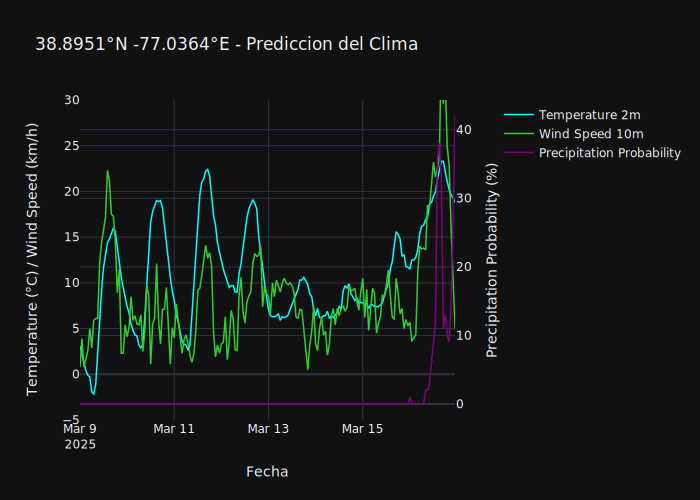

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "svg"

# Crear gráfico con múltiples ejes Y
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Línea 1: Temperatura (eje Y1, izquierda)
fig.add_trace(
    go.Scatter(x=df_weather['time'], y=df_weather['temperature_2m'], name="Temperature 2m", line=dict(color='cyan', width=1.5)),
    secondary_y=False
)

# Línea 2: Velocidad del viento (eje Y2)
fig.add_trace(
    go.Scatter(x=df_weather['time'], y=df_weather['windspeed_10m'], name="Wind Speed 10m", line=dict(color='limegreen', width=1.5)),
    secondary_y=False
)

# Línea 3: Probabilidad de Precipitacion (eje Y3, derecha)
fig.add_trace(
    go.Scatter(x=df_weather['time'], y=df_weather['precipitation_probability'], name="Precipitation Probability", line=dict(color='purple', width=1.5)),
    secondary_y=True
)

# Actualizar el diseño del gráfico
fig.update_layout(
    title=f"{latitude}°N {longitude}°E - Prediccion del Clima",
    xaxis_title="Fecha",
    template="plotly_dark",  # Tema oscuro como en la imagen
    legend=dict(x=1.05, y=1)
)

# Ajustar rangos de ejes Y para que coincidan visualmente con el ejemplo
fig.update_yaxes(title_text="Temperature (°C) / Wind Speed (km/h)", secondary_y=False, range=[-5, 30])
fig.update_yaxes(title_text="Precipitation Probability (%)", secondary_y=True)
fig.show()